<a href="https://colab.research.google.com/github/mkjubran/MANUAL-ENCS5141-INTELLIGENT-SYSTEMS-LAB/blob/main/Manual_ENCS5141_Exp3_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EXPLORATORY DATA ANALYSIS – FEATURE SELECTION AND FEATURE ENGINEERING

#Experiment #3: Feature Selection and Feature Engineering

This experiment focuses on discussing concepts and implementing code snippets to demonstrate various techniques used for feature selection nd feature engineering. These steps are vital in preparing data for machine learning and analysis. Throughout the experiment, you will also work on exercises to apply your knowledge and develop essential skills. The topics that will be discussed in the experiment are

##3.1 Feature Selection
3.1.1 Filtering Method using Variance \
3.1.2 Filtering Method using Information Gain \

##3.2 Data Transformation
3.2.1 Scalling \
3.3.2 Discreateization \
3.3.3 Encoding \

##3.3 Handling High-Dimensional Data
3.3.1 Principal Component Analysis \

---

---
---

<h1><center>Part One</center></h1>

---
---

#3.1 Feature Selection


Feature selection is a critical data preprocessing technique in machine learning that involves choosing a subset of the most relevant features (variables or columns) from a dataset. The goal of feature selection is to improve the performance of machine learning models by reducing the dimensionality of the data, eliminating irrelevant or redundant features, and enhancing model interpretability and generalization. There are several common feature selection methods, which can be categorized into three main types: filter methods, wrapper methods, and embedded methods.
*   **Filter Methods** involves using statistical measures to identify and select the most relevant features from a dataset. Some common filter methods for feature selection include:

  - **Variance**: This method removes features that have a low variance, which means that they do not vary much across the data. This can help to remove noise and irrelevant features.
  - **Information gain**: This method measures the reduction in entropy that is achieved by knowing the value of a feature. It can be used to identify features that are most informative for predicting the target variable.
  - **Chi-squared test**: This method is used to test the independence of two variables. It can be used to identify features that are correlated with the target variable, which can be useful for classification and regression tasks.
  - **Correlation coefficient**: This method measures the linear relationship between two variables. It can be used to identify features that are highly correlated with each other, which can be removed to reduce multicollinearity.
- **Wrapper Methods** are techniques that involve selecting the optimal subset of features by repeatedly training and evaluating the machine learning model with different feature subsets. These methods are called "wrapper" methods because they wrap around the machine learning algorithm to find the best feature set based on model performance.Wrapper methods are model-specific, meaning they consider the performance of a specific machine learning algorithm. This can lead to highly relevant feature subsets for that particular algorithm.
- **Embedded Methods** are techniques that incorporate feature selection directly into the process of training a machine learning model. Unlike filter methods that evaluate feature relevance independently of the chosen model, and wrapper methods that involve a separate evaluation process, embedded methods select features during the model training process itself. Some common examples of embedded methods are:
  - **L1 Regularization (Lasso)**: Penalizes the absolute values of feature coefficients, effectively encouraging sparse feature sets.
  - **Tree-Based Methods**: Decision trees and ensemble methods like Random Forest and Gradient Boosting inherently provide feature importance scores based on node impurity or information gain.
  - **Linear Support Vector Machines (SVM)**: SVMs can automatically select relevant support vectors, effectively reducing the dimensionality.

 In this experiment, our primary emphasis will be on filtering methods, while we will explore wrapper and embedded methods in upcoming experiments.

## 3.1.1 Filtering Method using Variance
To demonstrate the filtering method using the variance threshold, let us start with synthetic data as presented in the code snippet below.

In [1]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd


# Sample dataset with low-variance features
data = [[1.0, 2.4, 3.01],
     [1.1, 2.2, 3.04],
     [1.2, 2.1, 3.04],
     [1.1, 2.6, 3.06],
     [1.0, 2.5, 3.00],
     [1.1, 2.2, 3.01]]

columns =['col_1', 'col_2', 'col_3']

df = pd.DataFrame(data=data, columns=columns)
df.head()


,col_1,col_2,col_3
0,1.0,2.4,3.01
1,1.1,2.2,3.04
2,1.2,2.1,3.04
3,1.1,2.6,3.06
4,1.0,2.5,3.00


To assess the variance of individual features and apply the variance-based filtering method, we will employ the **VarianceThreshol()** method from sklearn. This method calculates the variance for each column (feature) and eliminates features with variances below a specified threshold, which we will set to 0 initially, thus retaining all features.

In [2]:
from sklearn.feature_selection import VarianceThreshold

# Initialize the VarianceThreshold selector with a threshold
selector = VarianceThreshold(threshold=0)

# Fit the selector to the data
selector = selector.fit(df)

# Apply the selector to the data
df_high_variance = selector.transform(df)

# Variance of the data
selector.variances_

array([0.00472222, 0.03222222, 0.00045556])

It's evident that the 'col_3' feature has significantly lower variance in comparison to the other features, and it will be excluded if we establish a threshold value of 0.001.

In [3]:
# Initialize the VarianceThreshold selector with a threshold
selector = VarianceThreshold(threshold=0.001)

# Fit and apply the selector to the data
df_high_variance = selector.fit_transform(df)

# Display the original and selected data
print("Original Data:")
print(df)

print("Data after VarianceThreshold:")
print(df_high_variance)

Original Data:
   col_1  col_2  col_3
0    1.0    2.4   3.01
1    1.1    2.2   3.04
2    1.2    2.1   3.04
3    1.1    2.6   3.06
4    1.0    2.5   3.00
5    1.1    2.2   3.01
Data after VarianceThreshold:
[[1.  2.4]
 [1.1 2.2]
 [1.2 2.1]
 [1.1 2.6]
 [1.  2.5]
 [1.1 2.2]]


**Task 3.1**: To understand the variance of a feature, modify the values of both feature **col_3** and feature **col_1** in such a way that, in the previous code snippet with a **0.001** threshold, the **col_3 feature will be retained, while the col_1 feature will be eliminated**.


In [4]:
#write you code here


To demonstrate the affect of applying the variance threshold filtering method on machine learning, we will implement this approach on the iris dataset. The Iris dataset is a classic and widely used dataset in machine learning and statistics. Within this dataset, there are 150 instances, each featuring 4 continuous, numeric attributes. The target variable, categorized by class, signifies the different Iris species: Iris-setosa, Iris-versicolor, and Iris-virginica. The attributes, also referred to as features, encompass the following dimensions:
- Sepal Length (measured in centimeters): This dimension quantifies the length of the sepal, which is the outermost part of the flower.
- Sepal Width (measured in centimeters): This dimension specifies the width of the sepal.
- Petal Length (measured in centimeters): This dimension characterizes the length of the petal, which constitutes the inner part of the flower.
- Petal Width (measured in centimeters): This dimension quantifies the width of the petal.

To display images of Iris flowers, run the following code.


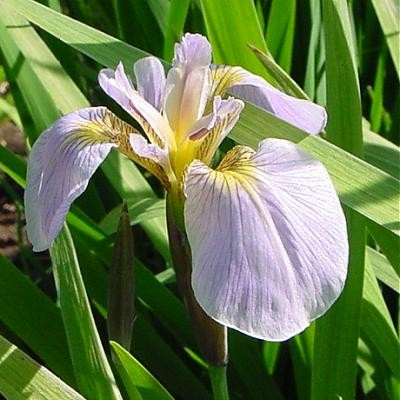

Iris Setosa



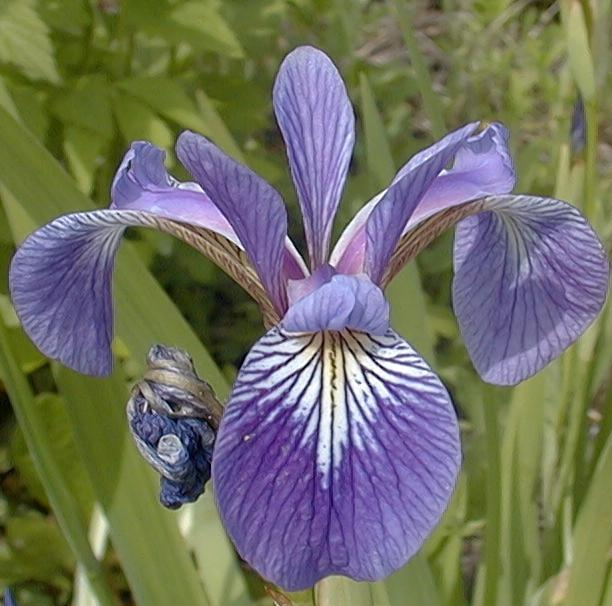

Iris Versicolor



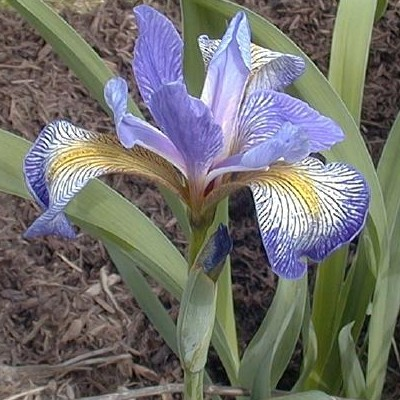

Iris Virginica


In [5]:
from IPython.core.display import Image, display
display(Image('http://mirlab.org/jang/books/dcpr/image/Iris-setosa-10_1.jpg', width=200, height=200))
print ("Iris Setosa\n")

display(Image('http://mirlab.org/jang/books/dcpr/image/Iris-versicolor-21_1.jpg', width=200, height=200))
print ("Iris Versicolor\n")

display(Image('http://mirlab.org/jang/books/dcpr/image/Iris-virginica-3_1.jpg', width=200, height=200))
print ("Iris Virginica")

To import the dataset and display the features of a sample, use the following code.

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Create a DataFrame to work with the dataset
iris_df = pd.DataFrame(data=np.c_[X, y], columns=data.feature_names + ['target'])

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


As previously explained, the dataset comprises four features and a label. To obtain the variance of each feature run the following code snippet.

In [7]:
# Apply Variance Threshold
selector = VarianceThreshold(threshold=0.3) # the threshold value is set to 0.3
X_variance = selector.fit_transform(X)

print(f"The variance of each featue: {selector.variances_}")

The variance of each featue: [0.68112222 0.18871289 3.09550267 0.57713289]


As observed, the features have varying variance values, and therefore, the feature selection method can be used to eliminate low variance features.

To investigate the impact of the variance threshold filtering method on machine learning, we will compare the performance of the machine learning models with and without feature filtering. In this context, we will employ the **train_test_split()** method to partition the dataset into training and testing datasets. Subsequently, we will utilize the training data to train the random forest classifier. Following the training, we will assess both training and testing accuracies (classification correctness). More comprehensive details regarding the random forest classifier and the training and evaluation processes will be discussed in future experiments.

In [8]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier on the original features and evaluate
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Apply Variance Threshold
selector = VarianceThreshold(threshold=0.3)
X_train_variance = selector.fit_transform(X_train)
X_test_variance = selector.transform(X_test)

# Train a classifier on the selected features and evaluate
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_variance, y_train)
y_pred = clf.predict(X_test_variance)
accuracy_variance = accuracy_score(y_test, y_pred)

print(f"The variance of each featue: {selector.variances_}")
print(f"Number of original features: {X_train.shape[1]}")
print(f"Number of features after variance threshold filtering: {X_train_variance.shape[1]}")
print(f"Accuracy of Original features (testing accuracy): {accuracy}")
print(f"Accuracy after variance threshold filtering (testing accuracy): {accuracy_variance}")


The variance of each featue: [0.67299931 0.20003056 3.04512222 0.56122222]
Number of original features: 4
Number of features after variance threshold filtering: 3
Accuracy of Original features (testing accuracy): 1.0
Accuracy after variance threshold filtering (testing accuracy): 1.0


Note that the order of applying feature filtering (feature selection or feature engineering) concerning splitting the dataset into training and testing sets is an important consideration in machine learning workflows. Here are the common approaches:
- **Apply Feature Filtering Before Splitting**:\
  *Advantages*:
  - Filtering is performed on the entire dataset, ensuring that the selected features are consistent across training and testing sets.
  - It can help reduce the risk of data leakage, where information from the testing set inadvertently influences the feature selection process.

  *Considerations*:
  - Make sure to perform feature selection using only the training data and then apply the same feature selection to the testing data to maintain consistency.

- **Apply Feature Filtering After Splitting**: \
  *Advantages*:
  - Feature filtering is applied separately to the training and testing sets, which mimics a real-world scenario where you may not have access to the entire dataset during feature selection.
  - Reduces the risk of overfitting to the training data during feature selection.

  *Considerations*:
  - Ensure that the same feature selection criteria or method is applied consistently to both the training and testing sets to maintain fairness in evaluation.

The choice between these approaches depends on factors such as the dataset size, the nature of the features, and the risk of data leakage. In practice, both methods can be effective if implemented correctly. In the preceding code snippet, feature filtering is applied prior to dataset splitting.

**Task 3.2**: To comprehend the effect of feature filtering using variance threshold on machine learning models, alter the value of the feature selection threshold in the previous code snippet and observe the number of eliminated and retained features, as well as the model's performance before and after feature filtering.

## 3.1.4 Filtering Method using Information Gain

**Task 3.3**: Modify the code snippet in the 'Filtering Method using Variance' section to demonstrate feature filtering using Information Gain. To calculate information gain, utilize the **mutual_info_classif** function in sklearn.

In [9]:
#write you code here


##Filtering Methods **Task 3.4**
In this task, you will compare different feature selection techniques. You will apply these techniques to a modified version of the Pima Indians Diabetes Database from Kaggle (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database). This dataset is originally from the Indian Institute of Diabetes and Digestive and Kidney Diseases. The dataset's objective is to predict, based on certain diagnostic measurements, whether a patient has diabetes or not. The Diabetes dataset is stored in a file named **ENCS5141_Exp3_Diabetes.csv**, which can be found in the GitHub repository located at https://github.com/mkjubran/ENCS5141Datasets.

After cloning the repository using the code below, apply the following procedure to solve the task:

1. Read the dataset from the ENCS5141_Exp3_Diabetes.csv file.
2. Apply the Random Forest classifier to the original dataset and measure the classification (testing) accuracy.
3. Utilize the four feature filtering methods mentioned previously for feature selection, then apply the Random Forest classifier to the selected features, and measure the testing accuracies for each method.
4. Experiment with varying the parameters of each feature filtering method and observe the effect on the classification accuracy of the Random Forest classifier.

In [10]:
!rm -rf ./ENCS5141Datasets
!git clone https://github.com/mkjubran/ENCS5141Datasets.git

Cloning into 'ENCS5141Datasets'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 54 (delta 12), reused 44 (delta 5), pack-reused 0
Receiving objects: 100% (54/54), 2.97 MiB | 13.50 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [11]:
#write you code here



#3.2 Data Transformation


Data Transformation is a crucial step in the data preprocessing phase of machine learning. It involves a series of operations aimed at preparing raw data into a format that is suitable for training and evaluating machine learning models. Data transformation encompasses several key processes, including scaling, normalization, discretization, and encoding, each serving its purpose in enhancing the quality and usability of the data. Here's a description of these data transformation techniques:

- **Scaling**: This method involves transforming numerical features to a common scale without changing their relative relationships. This is particularly important for algorithms that are sensitive to the magnitude of features. Scaling is applied to ensure that no single feature dominates the learning process due to its larger magnitude. The Min-Max scaling is a commonly used method in which features are scaled to a specific range, often [0, 1]. The standardization is another type of scaling that transforms numerical features to have a a zero mean and unity variance (mean=0, standard deviation=1).

- **Discretization**: This method involves converting continuous numerical data into discrete categories or bins. This is particularly useful when you want to transform numeric data into categorical or ordinal data. Discretization can simplify complex numerical data and make it suitable for algorithms that work with categorical or ordinal features. Some common techniques include equal-width binning (dividing the data into equal-width intervals) and equal-frequency binning (ensuring each bin contains approximately the same number of data points).

- **Encoding**: Encoding is the process of converting categorical data (text or labels) into a numerical format that machine learning models can understand. It allows algorithms to work with non-numeric data Some common encoding methods include **one-hot encoding** (creating binary columns for each category), **label encoding** (assigning a unique integer to each category), and **ordinal encoding** (mapping ordinal categories to numerical values).

## 3.2.1 Scaling

To demonstrate the Scaling method, let us start with synthetic data as presented in the code snippet below.

In [12]:
import numpy as np
import pandas as pd

#To generate an array of floating numbers between -2 and 2
A = np.random.random(1000)*4 - 2

#To generate an array of floating numbers between -10 and 10
B = np.random.random(1000)*20 - 10

#To generate an array of floating numbers between 0 and 1
C = np.random.random(1000)

#To generate an array of floating numbers between 0 and 10
D = np.random.random(1000)*10

df = pd.DataFrame({'A':A,'B':B,'C':C,'D':D})
df.head()

,A,B,C,D
0,-0.122731,7.905851,0.246882,5.779778
1,-0.048381,-4.226699,0.754458,6.425915
2,1.320039,7.358446,0.647265,4.661985
3,-1.102139,1.224547,0.893100,8.304230
4,0.226698,-6.330529,0.635802,7.229146


Let's also display some statistics about this synthetic data.

In [13]:
df.describe()

,A,B,C,D
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.013195,-0.089342,0.489457,5.027798
std,1.168911,5.849249,0.287780,2.858629
min,-1.998333,-9.973300,0.000059,0.038356
25%,-1.042421,-5.484149,0.262855,2.526010
50%,0.010322,-0.123459,0.484727,5.020540
75%,1.007880,4.906937,0.734053,7.447593
max,1.996501,9.991897,0.997906,9.991504


As can be observed, the range of values for each feature is different. To scale the data, we will use the **MinMaxScaler()** from sklearn. This method takes the intended minimum and maximum values of the scaled data as a tuple argument (min, max), which is set to (0, 1) by default.

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
data = scaler.transform(df)
df_scaler = pd.DataFrame(data,columns=list('ABCD'))
df_scaler.describe()

,A,B,C,D
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.496926,0.495059,0.490455,0.501293
std,0.292606,0.292972,0.288401,0.287209
min,0.000000,0.000000,0.000000,0.000000
25%,0.239287,0.224849,0.263364,0.249936
50%,0.502813,0.493351,0.485714,0.500564
75%,0.752525,0.745309,0.735578,0.744411
max,1.000000,1.000000,1.000000,1.000000


After scaling, all features are scaled between 0 and 1. Let's plot the distribution of the original and scaled data.

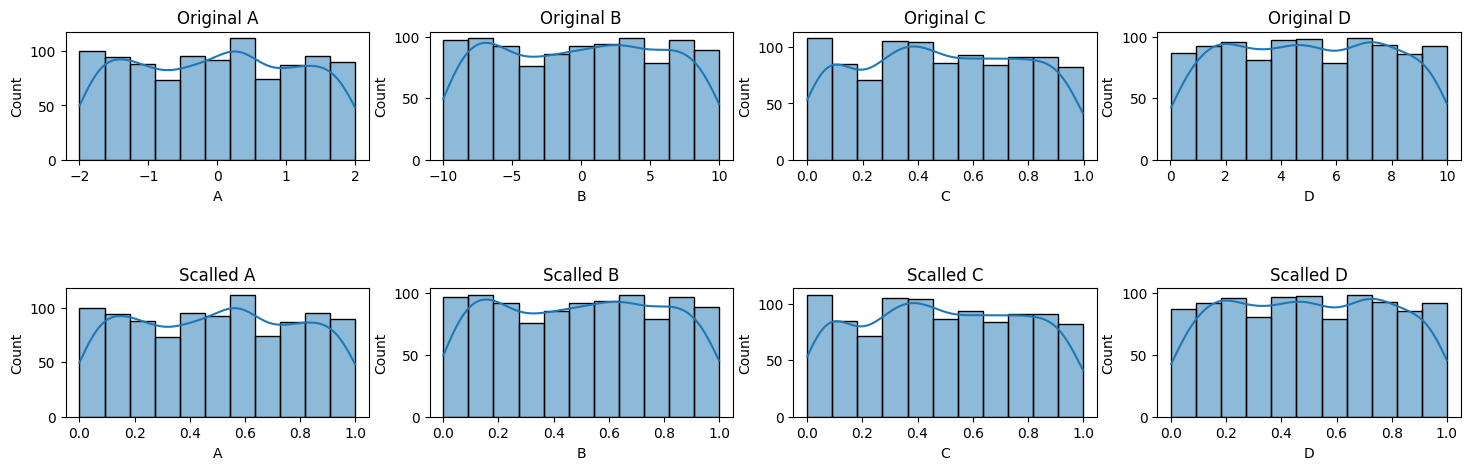

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(figsize=(18, 5),ncols=4,nrows=2)

sns.histplot(data=df, x="A", ax=axs[0,0], kde=True);axs[0,0].set_title(f"Original A")
sns.histplot(data=df, x="B", ax=axs[0,1], kde=True);axs[0,1].set_title(f"Original B")
sns.histplot(data=df, x="C", ax=axs[0,2], kde=True);axs[0,2].set_title(f"Original C")
sns.histplot(data=df, x="D", ax=axs[0,3], kde=True);axs[0,3].set_title(f"Original D")

sns.histplot(data=df_scaler, x="A", ax=axs[1,0], kde=True);axs[1,0].set_title(f"Scalled A")
sns.histplot(data=df_scaler, x="B", ax=axs[1,1], kde=True);axs[1,1].set_title(f"Scalled B")
sns.histplot(data=df_scaler, x="C", ax=axs[1,2], kde=True);axs[1,2].set_title(f"Scalled C")
sns.histplot(data=df_scaler, x="D", ax=axs[1,3], kde=True);axs[1,3].set_title(f"Scalled D")

fig.subplots_adjust(hspace=1)

The histogram plots illustrate that scaling did not alter the distribution of the features but did affect the range of their values.

To illustrate the significance of feature scaling in many machine learning scenarios, consider the data within the **ENCS5141_Exp3_Mall_Customers.csv** file, available in the GitHub repository at https://github.com/mkjubran/ENCS5141Datasets. This dataset includes the annual income and spending score of numerous mall customers. As before, we will initiate by cloning the GitHub repository. You may skip this step if the repository has already been cloned

In [16]:
!rm -rf ./ENCS5141Datasets
!git clone https://github.com/mkjubran/ENCS5141Datasets.git

Cloning into 'ENCS5141Datasets'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 54 (delta 12), reused 44 (delta 5), pack-reused 0
Receiving objects: 100% (54/54), 2.97 MiB | 11.00 MiB/s, done.
Resolving deltas: 100% (12/12), done.


To read the file and display information about the features run the following code

In [17]:
import pandas as pd
df = pd.read_csv("/content/ENCS5141Datasets/ENCS5141_Exp3_Mall_Customers.csv", index_col=0)
df.describe()

,Annual Income,Spending Score
count,30.000000,30.000000
mean,21433.333333,50.866667
std,4452.301484,33.053492
min,15000.000000,3.000000
25%,18250.000000,18.500000
50%,20000.000000,53.500000
75%,24750.000000,78.500000
max,29000.000000,99.000000


As can be observed, the Annual Income feature has a range in the thousands, whereas the Spending Score is in tens.

To investigate the impact of the scalling on machine learning, we will compare the performance of the machine learning models with and without feature scalling. In this context, we will use the K-Means classifier to cluster the data into groups. The classifier will be discussed in detail in subsequent experimental sessions.

In [18]:
# Import the KMeans class from the sklearn.cluster module
from sklearn.cluster import KMeans

# Create a KMeans object with the desired number of clusters (4 in this case)
km = KMeans(n_clusters=4)

# Fit the KMeans model to the data, using the 'Annual Income' and 'Spending Score' columns as features
km.fit(df[['Annual Income', 'Spending Score']])

# Predict the cluster labels for each data point based on the fitted model
cluster = km.predict(df[['Annual Income', 'Spending Score']])

# Create a new column 'cluster' in the DataFrame to store the predicted cluster labels
df['cluster'] = cluster

# Display the first few rows of the DataFrame with the 'cluster' column added
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Annual Income,Spending Score,cluster
CustomerID,,,
1,15000,30,3
2,15000,81,3
3,16000,6,3
4,16000,77,3
5,17000,33,3


To visualize the resuls, use the **sns.scatterplot()** as below

<Axes: xlabel='Annual Income', ylabel='Spending Score'>

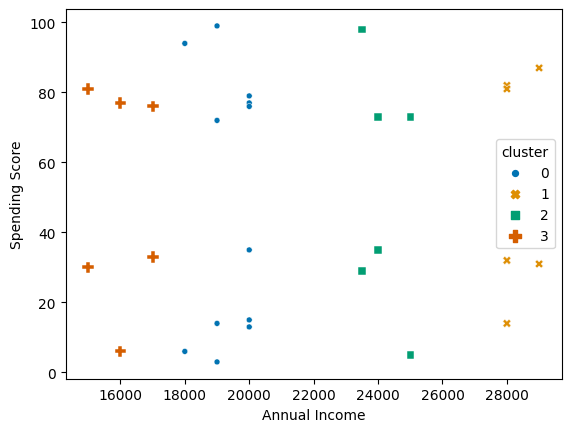

In [19]:
# Import the seaborn library for data visualization
import seaborn as sns

# Create a scatter plot:
# - x-axis: 'Annual Income'
# - y-axis: 'Spending Score'
# - 'hue' parameter assigns different colors to data points based on the 'cluster' column
# - 'style' parameter assigns different markers/styles to data points based on the 'cluster' column
# - 'size' parameter adjusts the size of data points based on the 'cluster' column
# - 'palette' parameter defines the color palette used for the plot
sns.scatterplot(x=df['Annual Income'], y=df['Spending Score'], hue=df['cluster'], style=df['cluster'], size=df['cluster'], palette='colorblind')

From the scatter plot, it's evident that the points are grouped or clustered based on the 'Annual Income' (with values in thousands) and do not take into account the 'Spending Score' feature (with values in tens). Is this an acceptable clustering approach?

Let us repeate the classification but after feature scalling.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='Annual Income', ylabel='Spending Score'>

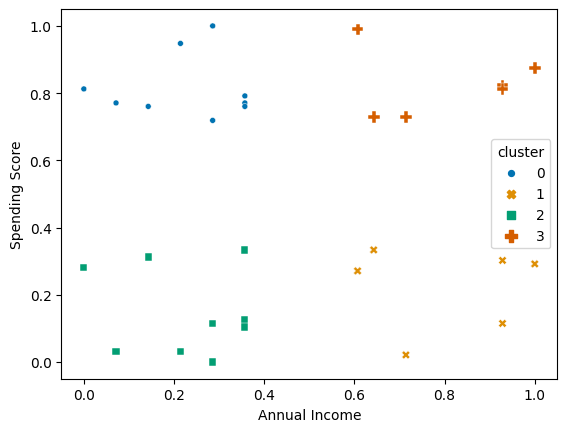

In [20]:
# Import the MinMaxScaler class from the sklearn.preprocessing module
from sklearn.preprocessing import MinMaxScaler

# Import the KMeans class from the sklearn.cluster module
from sklearn.cluster import KMeans

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the DataFrame 'df', which computes the minimum and maximum values for scaling
scaler.fit(df)

# Transform and scale the data in 'df' using the fitted scaler
data = scaler.transform(df)

# Create a new DataFrame 'df_scaler' to store the scaled data, maintaining column names from 'df'
df_scaler = pd.DataFrame(data, columns=df.columns)


# Create a KMeans object with the desired number of clusters (4 in this case)
km = KMeans(n_clusters=4)

# Fit the KMeans model to the data, using the 'Annual Income' and 'Spending Score' columns as features
km.fit(df_scaler[['Annual Income', 'Spending Score']])

# Predict the cluster labels for each data point based on the fitted model
cluster = km.predict(df_scaler[['Annual Income', 'Spending Score']])

# Create a new column 'cluster' in the DataFrame to store the predicted cluster labels
df_scaler['cluster'] = cluster

# Create a scatter plot:
# - x-axis: 'Annual Income'
# - y-axis: 'Spending Score'
# - 'hue' parameter assigns different colors to data points based on the 'cluster' column
# - 'style' parameter assigns different markers/styles to data points based on the 'cluster' column
# - 'size' parameter adjusts the size of data points based on the 'cluster' column
# - 'palette' parameter defines the color palette used for the plot
sns.scatterplot(x=df_scaler['Annual Income'], y=df_scaler['Spending Score'], hue=df_scaler['cluster'], style=df_scaler['cluster'], size=df_scaler['cluster'], palette='colorblind')


**Task 3.5**: Referring to the figure shown above, please provide your observations regarding the clustering of Mall Customers' records both before and after the scaling process.

In [21]:
#write you code here


**Task 3.6**: To demonstrate the impact of scaling on machine learning, your task is to cluster the records in the 'tips' dataset based on the **total_bill** and **tip** features, both before and after applying feature scaling.

**Note**: The tips dataset contains information about tips received by a waiter over a few months in a restaurant. It has details like how much tip was given, the bill amount, whether the person paying the bill is male or female, if there were smokers in the group, the day of the week, the time of day, and the size of the group.

You may load the dataset using the following code snippet.

In [22]:
# Load an example dataset
tips = sns.load_dataset("tips")
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [23]:
#write you code here


---
---

<h1><center>Part Two</center></h1>

---
---

## 3.2.2 Discretization



To demonstrate discretization, we will load the "fetch_california_housing" dataset. This dataset is a popular dataset used in machine learning. It contains data related to housing in California, primarily for the purpose of regression analysis. This dataset is often used for tasks such as predicting the median house value for districts in California based on various features. The dataset includes several features that can be used as input variables for regression models. Some of the typical features include median income, average house occupancy, latitude, longitude, and more. The target variable is the median house value for each district. This is the variable that you typically aim to predict in regression tasks.

In [24]:
from sklearn.datasets import fetch_california_housing
X,y = fetch_california_housing(return_X_y= True, as_frame = True)
df = pd.concat((X,y), axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**3.2.2.1 Equal Width Discretiser**

Equal Width Discretiser is a data preprocessing technique used in feature engineering to transform continuous numerical data into discrete categories of equal width. This method divides the range of the data into a specified number of bins or intervals, ensuring that each bin has the same width or range.

In [25]:
# Install the feature_engine library if not already installed
!pip install feature_engine

# Import the required library and module
from feature_engine import discretisation as dsc

# Set up the discretisation transformer with specified parameters:
# - 'bins' sets the number of bins or intervals (8 in this case)
# - 'variables' specifies the columns to be discretized
# - if 'return_boundaries=True' is set, then it indicates that you want to return bin boundaries and not the discreate values
disc = dsc.EqualWidthDiscretiser(bins=8, variables=['MedInc'])

# Fit the transformer on the selected variables
disc.fit(df[['MedInc']])

# Create a copy of the original DataFrame to store the discretized data
df_EqualWidthDiscretiser = df.copy()

# Transform the specified columns using the fitted discretisation transformer
df_EqualWidthDiscretiser[['MedInc']] = disc.transform(df[['MedInc']])

# Access the bin boundaries dictionary (not required for the main discretization)
disc.binner_dict_

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 2.7 MB/s eta 0:00:00


{'MedInc': [-inf,
  2.312425,
  4.12495,
  5.937475,
  7.75,
  9.562525,
  11.37505,
  13.187574999999999,
  inf]}

To print the DataFrame after discretisation of the MedInc

In [26]:
df_EqualWidthDiscretiser.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,4,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,4,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,3,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,2,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,1,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


As can be observed, the 'MedInc' feature values have been converted into discrete values. To print the width of the bins used for discretization, execute the following code:

In [27]:
np.array(disc.binner_dict_['MedInc'][1:]) - np.array(disc.binner_dict_['MedInc'][0:-1])

array([     inf, 1.812525, 1.812525, 1.812525, 1.812525, 1.812525,
       1.812525,      inf])

As observed, all bins, except the first and last ones, have the same width. Let us plot the distribution before and after discretisation.

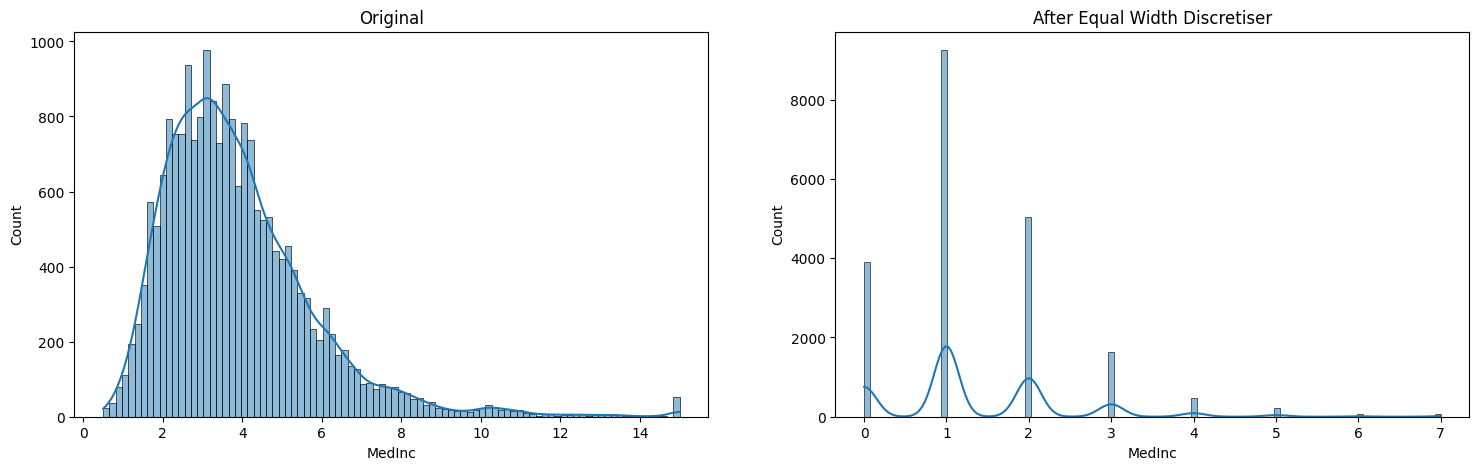

In [28]:
import seaborn as sns
fig, axs = plt.subplots(figsize=(18, 5),ncols=2,nrows=1)

sns.histplot(data=df, x="MedInc", ax=axs[0], kde=True);axs[0].set_title(f"Original")
sns.histplot(data=df_EqualWidthDiscretiser, x="MedInc", ax=axs[1], kde=True);axs[1].set_title(f"After Equal Width Discretiser")
fig.subplots_adjust(hspace=1)

**Task 3.9**: What do you observe from the distributions of the MedInc feature before and after discretisation?

**3.2.2.2 Equal-frequency discretization**

Equal-frequency discretization is another data preprocessing technique used in feature engineering to transform continuous numerical data into discrete categories of equal frequency. This method divides the range of the data into a specified number of bins or intervals, ensuring that each bin contains approximately the same number of data points.

**Task 3.10**: In this task, you will utilize the **KBinsDiscretizer** from scikit-learn (sklearn.preprocessing) to:
1. Fit and apply the KBinsDiscretizer to the 'MedInc' feature in the 'fetch_california_housing' dataset.
2. Plot and observe the histogram for the transformed feature.

In [29]:
#write you code here


##3.2.3 Encoding


Encoding involves converting categorical data, such as text or labels, into a numerical format that machine learning models can interpret. In this experiment, you will investigate three encoding methods: one-hot encoding (creating binary columns for each category), label encoding (assigning a unique integer to each category), and ordinal encoding (mapping ordinal categories to numerical values).

**3.2.3.1 One-hot encoding**

To demonstrate one-hot encoding, You will apply these techniques to a modified version of the Medical Cost Personal Dataset from Kaggle (https://www.kaggle.com/datasets/mirichoi0218/insurance). This dataset provides information pertaining to healthcare and medical insurance costs. It includes the following features:

1. Age: Represents the age of the insured individuals.
2. Gender: Indicates the gender of the insured individuals (male or female).
3. BMI (Body Mass Index): A numerical measure that assesses body weight in relation to height.
4. Children: Denotes the number of children or dependents covered by the insurance plan.
5. Smoker: Specifies whether the insured individuals are smokers (with values typically as "yes" or "no").
6. Region: Describes the geographic region or location where the insured individuals reside.
7. Charges: Represents the medical insurance charges or costs incurred by the insured individuals.

This dataset is stored in a file named **ENCS5141_Exp3_MedicalCostPersonalDatasets.csv**, which can be found in the GitHub repository located at https://github.com/mkjubran/ENCS5141Datasets.

To clone the repository if you haven't already done so, execute the following code

In [30]:
!rm -rf ./ENCS5141Datasets
!git clone https://github.com/mkjubran/ENCS5141Datasets.git

Cloning into 'ENCS5141Datasets'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 54 (delta 12), reused 44 (delta 5), pack-reused 0
Receiving objects: 100% (54/54), 2.97 MiB | 21.09 MiB/s, done.
Resolving deltas: 100% (12/12), done.


To read the file into a DataFrame and display information about the file run the following code snippet

In [31]:
import pandas as pd
df = pd.read_csv("/content/ENCS5141Datasets/ENCS5141_Exp3_MedicalCostPersonalDatasets.csv")
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Use the **OneHotEncoder** from sklearn to encode the **gender** feature.

In [32]:
# Import the necessary library for one-hot encoding
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder with 'handle_unknown' set to 'ignore'
enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the 'gender' column of the DataFrame
enc.fit(df[['gender']])

# Transform the 'gender' column into a one-hot encoded array and convert it to a dense array
df_gender = enc.transform(df[['gender']]).toarray()

# Create a copy of the original DataFrame to store the one-hot encoded data
df_ohenc = df.copy()

# Add the one-hot encoded columns to the new DataFrame using the encoder's categories
df_ohenc[enc.categories_[0]] = df_gender

# Display the first few rows of the new DataFrame
df_ohenc.head()


,age,gender,bmi,children,smoker,region,charges,female,male
0,19,female,27.900,0,yes,southwest,16884.92400,1.0,0.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,1.0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,1.0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0


Each category is represented by its own distinct binary column in the encoding. Remember to exclude the original 'gender' (text) feature from the encoded dataset before using it for machine learning purposes

**Task 3.9**: use the OneHotEncoder from sklearn from sklearn to encode the **smoker** and **region** features.

In [33]:
#write you code here


**3.2.3.1 Label encoding**

**Task 3.10**: use the LabelEncoder from sklearn (sklearn.preprocessing) to encode all text features in the Medical Cost Personal Dataset and observe the difference between one-hot encoding and label encoding.

In [34]:
#write you code here


#3.3 Handling High-Dimensional Data

To tackle this challenge, various techniques and strategies are employed. In this experiment, we will specifically investigate dimensionality reduction techniques as an approach to address high-dimensional data. Our focus will be on two prominent methods for dimensionality reduction: Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA).

**Principal Component Analysis (PCA)**: PCA is one of the most widely used techniques for reducing the dimensionality of data. It transforms the original features into a new set of orthogonal features called principal components. These components capture the maximum variance in the data, allowing for dimensionality reduction while retaining as much information as possible.

**Linear Discriminant Analysis (LDA)**: LDA is used when the goal is not just dimensionality reduction but also class separation. It finds a linear combination of features that maximizes the distance between different classes while minimizing the variance within each class.

Both PCA and LDA are dimensionality reduction techniques, PCA is unsupervised and aims to capture maximum variance, whereas LDA is supervised and focuses on maximizing class separation. The choice between PCA and LDA depends on the specific goals of your machine learning task and whether you are dealing with a classification problem.

##3.3.1 Principle component Analysis


**3.1.1.1 Synthetic Data**

To demonstrate the PCA, let us start with synthetic data as presented in the code snippet below.

In [35]:
import numpy as np
import pandas as pd

#To generate an array of floating numbers between -2 and 2
A = np.random.random(1000)*4 - 2

#To generate an array of floating numbers between -10 and 10
B = np.random.random(1000)*20 - 10

#To generate an array of floating numbers between 0 and 1
C = np.random.random(1000)

#To generate an array of floating numbers between 0 and 10
D = np.random.random(1000)*10

df = pd.DataFrame({'A':A,'B':B,'C':C,'D':D})
df.head()

,A,B,C,D
0,0.299323,-1.663805,0.566948,6.517369
1,-0.596714,4.282761,0.739234,4.745666
2,-1.785478,-4.916473,0.584782,6.505290
3,1.930166,-4.547080,0.163234,1.339021
4,-1.668633,2.696654,0.128367,3.514776


Utilize scikit-learn's **PCA** (Principal Component Analysis) to derive PCA components from the synthetic data. In this context, we will configure the n_components parameter to yield a result of 4 components.

In [36]:
# Import the PCA module from scikit-learn
from sklearn.decomposition import PCA

# Create an instance of PCA with n_components set to 4
pca = PCA(n_components=4)

# Fit the PCA model on the data (assuming 'df' contains your dataset)
pca.fit(df)

# Print the explained variance ratio for each selected component
print(f"Explained variance ratio for each PCA component are {pca.explained_variance_ratio_}")

# Transform the original DataFrame 'df' using PCA
Array_PCA = pca.transform(df)

# Create a new DataFrame 'df_PCA' from the transformed data
df_PCA = pd.DataFrame(Array_PCA)

# Display the first few rows of the new DataFrame
df_PCA.head()

Explained variance ratio for each PCA component are [0.77420272 0.19188723 0.03188074 0.00202931]


,0,1,2,3
0,1.916192,-1.374268,0.288870,-0.062861
1,-4.002233,0.516125,-0.547489,-0.242602
2,5.148972,-1.421133,-1.826168,-0.079278
3,4.916173,3.743365,1.905109,0.323022
4,-2.402246,1.720330,-1.631059,0.364689


Observing the explained variance ratio, which indicates how much of the total variance in the original dataset is accounted for by each principal component, we notice a decreasing trend. This suggests that the initial PCA components have higher variance compared to the later ones. Now, let's visualize the histograms before and after applying PCA

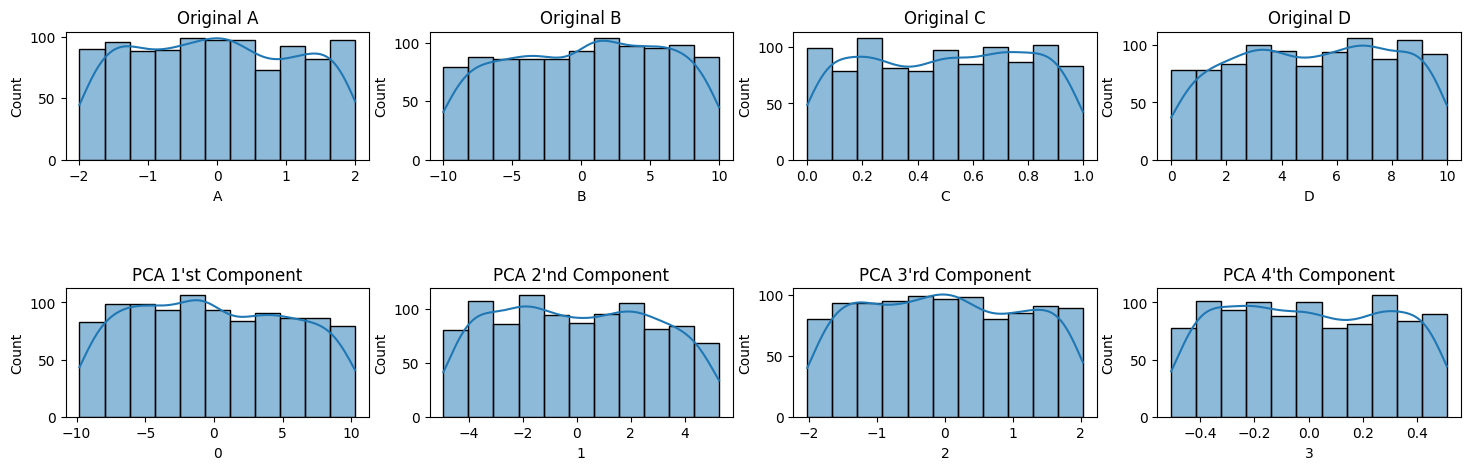

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(figsize=(18, 5),ncols=4,nrows=2)

sns.histplot(data=df, x="A", ax=axs[0,0], kde=True);axs[0,0].set_title(f"Original A")
sns.histplot(data=df, x="B", ax=axs[0,1], kde=True);axs[0,1].set_title(f"Original B")
sns.histplot(data=df, x="C", ax=axs[0,2], kde=True);axs[0,2].set_title(f"Original C")
sns.histplot(data=df, x="D", ax=axs[0,3], kde=True);axs[0,3].set_title(f"Original D")

sns.histplot(data=df_PCA, x=0, ax=axs[1,0], kde=True);axs[1,0].set_title(f"PCA 1'st Component")
sns.histplot(data=df_PCA, x=1, ax=axs[1,1], kde=True);axs[1,1].set_title(f"PCA 2'nd Component")
sns.histplot(data=df_PCA, x=2, ax=axs[1,2], kde=True);axs[1,2].set_title(f"PCA 3'rd Component")
sns.histplot(data=df_PCA, x=3, ax=axs[1,3], kde=True);axs[1,3].set_title(f"PCA 4'th Component")

fig.subplots_adjust(hspace=1)

Notice that the distribution of features in the original data differs from that of the PCA components. Additionally, observe the range of values in the PCA components, where the first component covers a wider range than the second, and this pattern continues for the other PCA components.


**Task 3.11**: Modify the numer of components to be preserved by PCA in the previous code and examine the outcomes.

**3.1.1.2 "Digits" Dataset**

To assess the influence of PCA on machine learning, we will evaluate and compare the performance of machine learning models with and without employing PCA for feature processing. We will load the "Digits" dataset from sklearn. This dataset is a commonly employed for practicing classification algorithms. Here are the key characteristics of the Digits dataset:
- **Data Source**: The dataset consists of 8x8 pixel images of handwritten digits (0 through 9). These images are grayscale and were originally collected from different individuals.
- **Data Format**: Each image is represented as an 8x8 matrix of pixel values. In scikit-learn, these matrices are flattened into 64-element feature vectors, where each element represents the intensity of a pixel (ranging from 0 to 16).
- **Target Labels**: For each image, there is a corresponding label (target) that indicates the digit it represents (0 through 9). These labels are commonly used for classification tasks, where the goal is to train a machine learning model to recognize handwritten digits.

In this context, we will employ the **train_test_split()** method to partition the dataset into training and testing datasets. Subsequently, we will utilize the training data to train the random forest classifier. Following the training, we will assess the testing accuracies (classification correctness) before and after PCA. More comprehensive details regarding the random forest classifier and the training and evaluation processes will be discussed in future experiments.

In [38]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier on the original features and evaluate
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Create PCA instance and fit to the data
pca = PCA(n_components=8)  # Specify the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a classifier on the retained PCA components and evaluate
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
accuracy_variance = accuracy_score(y_test, y_pred)

# Print the explained variance ratio for each selected component
print(f"Explained variance ratio for each PCA component: {pca.explained_variance_ratio_}")

print(f"Number of original features: {X_train.shape[1]}")
print(f"Number of features retained after PCA: {X_train_pca.shape[1]}")
print(f"Accuracy of Original features (testing accuracy): {accuracy}")
print(f"Accuracy after PCA (testing accuracy): {accuracy_variance}")

Explained variance ratio for each PCA component: [0.14804542 0.13685747 0.12028728 0.08430325 0.05633691 0.04930787
 0.04276504 0.03567037]
Number of original features: 64
Number of features retained after PCA: 8
Accuracy of Original features (testing accuracy): 0.9722222222222222
Accuracy after PCA (testing accuracy): 0.9472222222222222


**Task 3.12**: Adjust the number of components to be retained by PCA in the code snippet for classifying images in the Digits dataset and observe how it affects the classification accuracy.

**Task 3.13**: In this task, you will reinforce the knowledge acquired during the experiment concerning the impact of applying PCA on machine learning. You will be working with the "Faces in the Wild" (LFW) dataset. The LFW dataset is a widely recognized benchmark dataset within the domains of computer vision and machine learning, primarily used for face recognition tasks. It comprises a collection of grayscale images featuring human faces, with each image associated with the identity of the depicted individual.

Once you have loaded the dataset, your objective is to implement the following steps:
1. Split the dataset into training and testing subsets.
2. Train a random forest model using the training data.
3. Assess the model's accuracy by evaluating its performance on the testing data.
4. Apply PCA with a specified number of components, such as n=8.
5. Train and evaluate the random forest model using the retained PCA components.
6. Experiment with different numbers of retained PCA components and provide insights based on your observations.


You can load the LFW dataset using the provided code snippet.

In [39]:
from sklearn.datasets import fetch_lfw_people

lfw_dataset = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Extract the data and target labels
X = lfw_dataset.data
y = lfw_dataset.target

In [40]:
#write you code here


#**Case Study 3.1**
In this case study, you will perform essential data preprocessing steps on the Penguins dataset. The dataset contains information about different species of penguins, including their physical characteristics and the region where they were observed. Your goal is to prepare the dataset for machine learning analysis. Follow these steps:
1. Load the penguins dataset using the code snippet provided below.
2. Perform initial data exploration to understand the dataset's structure, features, and any missing values. Summarize the dataset's statistics and gain insights into the data.
3. Address any data quality issues, such as missing values and outliers. Decide on an appropriate strategy for handling missing data, such as imputation or removal of rows/columns.
4. Analyze the relevance of each feature for your machine learning task by using the learned use feature selection technques.
5. If the dataset contains categorical variables, encode them into a numerical format suitable for machine learning models.
6. Split the dataset into training and testing subsets to evaluate the performance of your machine learning models.
7. Scale or normalize the numerical features to ensure consistent scaling across variables.
8. Apply suitable dimensionality reduction techniques to reduce the size of the data while preserving important information.
9. Validate your preprocessing pipeline by training and evaluating a machine learning model, such as the Random Forest model, on the preprocessed data. Compare the results to the model trained on the raw data (before feature filtering, transformation, and reduction) to ensure that preprocessing has improved model performance.







In [41]:
# Import the 'load_dataset' function from seaborn to load the penguins dataset
from seaborn import load_dataset

# Load the penguins dataset and store it in the 'df' DataFrame
df = load_dataset('penguins')

# Display the first few rows of the DataFrame to get an initial look at the data
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [42]:
#write you code here
